# Exploratory Data Analysis & Clustering

This notebook demonstrates several techniques relating to **Exploratory Data Analysis (EDA)** and **clustering** on three datasets already presented in the lecture: Iris, California Housing, and 20 Newsgroups.

Both EDA and clustering are common techniques used during the early stages of working with a dataset in order to gain a better understanding of the data and patterns it contains.

Clustering is also often applied to datasets that lack explicit labels.

Two example implementations of **dimensionality reduction** algorithms are also used in order to facilitate graphing clusters in a 2D plane.

## Imports

In [1]:
import time
from tqdm import tqdm

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_20newsgroups

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score

import ipywidgets as widgets
from IPython.display import display, clear_output

## Iris

First, let's revisit the Iris dataset.

### Download the Dataset

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2023-12-12 13:34:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.data.3’

iris.data.3             [ <=>                ]   4.44K  --.-KB/s    in 0s      

2023-12-12 13:34:48 (15.3 MB/s) - ‘iris.data.3’ saved [4551]



### Load the Dataset

In [3]:
df = pd.read_csv('iris.data', header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Initial Descriptive Statistics

Using the *describe* and *corr* functions provided by Pandas. 

Note that *corr* can only be applied to numeric column values.

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### Column Correlations

Approximate guidelines for interpreting (absolute values of) correlation coefficients:

- 0.00−0.19: Very weak correlation
- 0.20−0.39: Weak correlation
- 0.40−0.59: Moderate correlation
- 0.60−0.79: Strong correlation
- 0.80−1.00: Very strong correlation

Note that correlations can be positive or negative.

In [6]:
df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### Seaborn Pairplot

The pairplot graphs pairwise relationships between features in a dataset.

The function creates a grid of axes such that each numeric variable in the data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the distribution of the data in each column.

Specify the *hue* parameter to color-code the data by class labels (which you may have for labeled data).

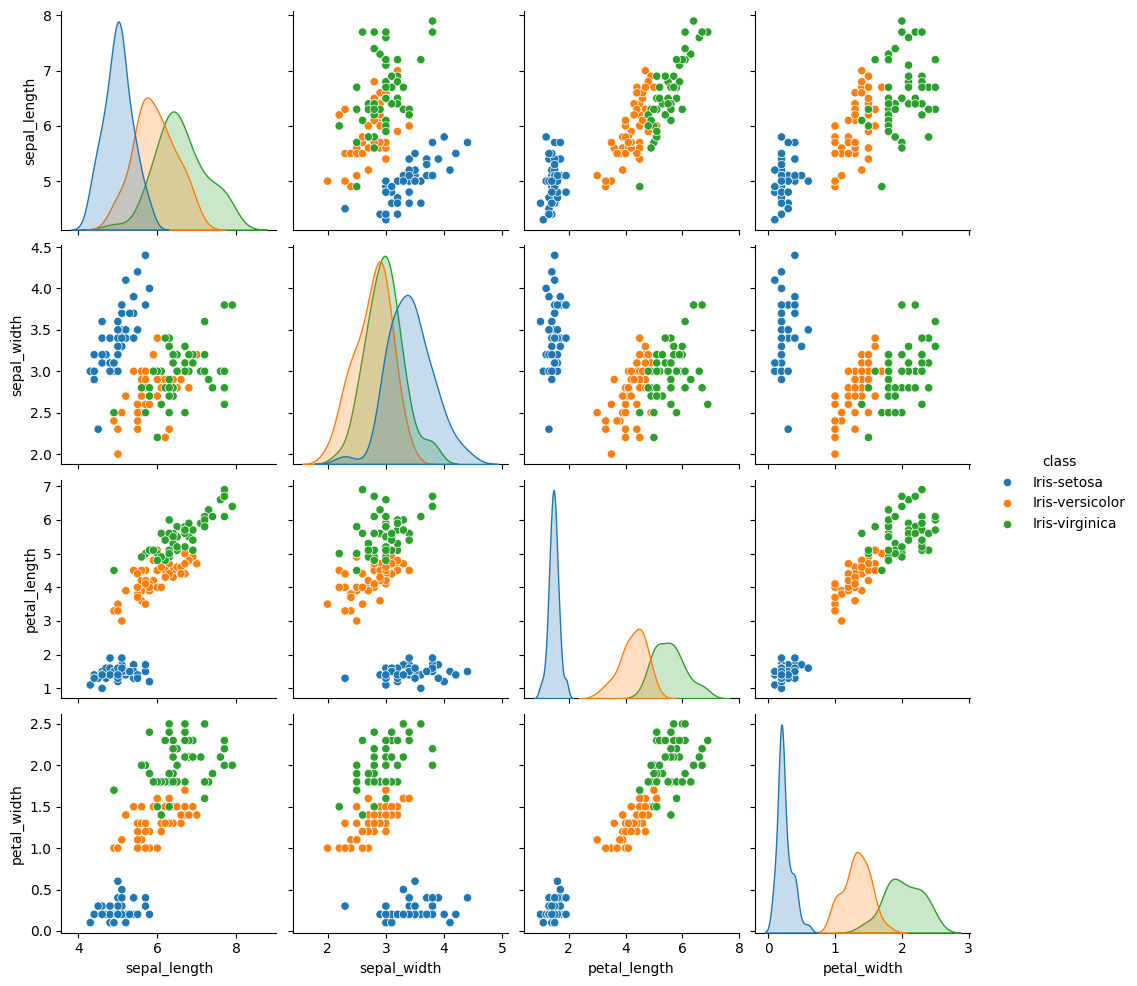

In [7]:
sns.pairplot(df, hue='class')

### Feature Scaling

Scale all features into similar ranges.

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

### Clustering

Just like with supervised learning, there are many possible clustering algorithms we can apply to our data. Scikit-learn provides implementations of many of the most commonly-used algorithms: https://scikit-learn.org/stable/modules/clustering.html

The choice of algorithm (and configuring its parameters) has a huge impact on the clusters that are identified.

For some algorithms, such as the very well-known K-Means clustering, the number of clusters to be found must be specified manually as an input parameter. For others, such as DBSCAN, the number of clusters is identified automatically.

In [9]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, n_init="auto")
df["kmeans"] = kmeans.fit_predict(scaled_data)

# Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
df["agglomerative"] = agglomerative.fit_predict(scaled_data)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
dbscan = DBSCAN()
df["dbscan"] = dbscan.fit_predict(scaled_data)

# MeanShift
meanshift = MeanShift()
df["meanshift"] = meanshift.fit_predict(scaled_data)

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,class,kmeans,agglomerative,dbscan,meanshift
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1,0,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1,0,1,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0,1,0
147,6.5,3.0,5.2,2.0,Iris-virginica,1,0,1,0
148,6.2,3.4,5.4,2.3,Iris-virginica,1,0,-1,0


### Dimensionality Reduction + Clustering

In order to graph the data visually in a 2D space we can apply a dimensionality reduction technique called **T-SNE** in order to project the data into a smaller dimensional space (in this case 2 dimensions) while attempting to retain as much of the information represented in the original dataset as possible.

We can then apply the clustering to this dimensionallity-reduced data.

In [11]:
dim_reduced_data = TSNE(n_components=2, perplexity=50).fit_transform(scaled_data)

n_clusters = 3

df["kmeans"] = KMeans(n_clusters=n_clusters, n_init="auto").fit_predict(dim_reduced_data)
df["agglomerative"] = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(dim_reduced_data)
df["dbscan"] = DBSCAN(eps=3).fit_predict(dim_reduced_data)
df["meanshift"] = MeanShift().fit_predict(dim_reduced_data)

# Interpret cluster IDs as string values for consistent graph coloring (below)
df['kmeans'] = df['kmeans'].astype(str)
df['agglomerative'] = df['agglomerative'].astype(str)
df['dbscan'] = df['dbscan'].astype(str)
df['meanshift'] = df['meanshift'].astype(str)

### Cluster Rendering

Function and input controls to interactively render identified clusters

In [12]:
def render_clustering():
    
    cluster_data = df[clustering_dropdown.value]
    
    plot_data = []
    for dim_reduced, cluster, label in zip(dim_reduced_data, cluster_data, df["class"]):

        if coloring_dropdown.value == "cluster":
            label = cluster

        plot_data.append({"Cluster": label, "x": dim_reduced[0], "y": dim_reduced[1]})
    plot_data_df = pd.DataFrame(plot_data)
    
    clear_output(wait=True)
    display(widgets.HBox([clustering_dropdown, coloring_dropdown, button]))

    tsne_plot = sns.scatterplot(
        x="x", y="y",
        hue="Cluster",
        data=plot_data_df,
        legend="full",
    )
    sns.move_legend(tsne_plot, "upper left", bbox_to_anchor=(1, 1))

# Dropdown menus
clustering_dropdown = widgets.Dropdown(
    options=['kmeans', 'agglomerative', 'dbscan', 'meanshift'],
    value='kmeans',
    description='Clustering:'
)
coloring_dropdown = widgets.Dropdown(
    options=['cluster', 'label'],
    value='cluster',
    description='Coloring:'
)

# Button and attached listener function
button = widgets.Button(
    description='Render'
)
def on_button_click(b):
    render_clustering()
button.on_click(on_button_click)

widgets.HBox([clustering_dropdown, coloring_dropdown, button])

### Cluster Properties

After clustering the data, we can examine the individual properties of data in each cluster to identify patterns.

In [13]:
cluster_algorithm = "kmeans"
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

df.groupby(cluster_algorithm)[features].mean().reset_index()

,kmeans,sepal_length,sepal_width,petal_length,petal_width
0,0,6.777083,3.091667,5.491667,1.958333
1,1,5.006000,3.418000,1.464000,0.244000
2,2,5.786538,2.669231,4.365385,1.415385


## California Housing

The California Housing dataset is a more realistic candidate for EDA and clustering as it has many more samples, features, and is not nearly as trivial of a "problem" as the Iris dataset.

### Load the Data

In [14]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MEDV'] = california_housing.target

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [15]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Visualizing Feature Distributions via Boxplots

Boxplots graph distributions of data and allow for easy identification of outlier data points.

<Axes: >

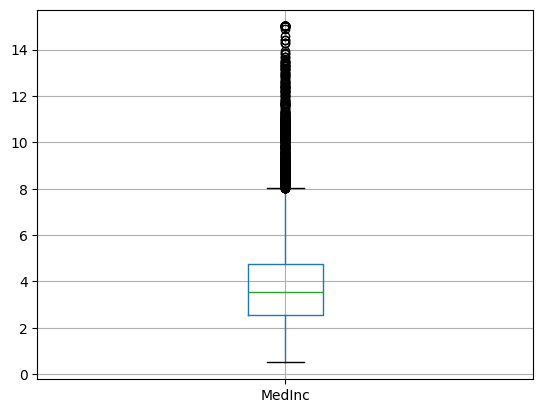

In [16]:
df[["MedInc"]].boxplot()

### Data Scaling

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

### Dimensionality Reduction

As above, we apply t-SNE to reduce the data to a dimensionality of 2 for graphing (interpreting the dimensions as X and Y coordinates).

Note that due to the higher number of samples and dimensionality in this dataset, running the following cell may take several minutes.

- **Perplexity** 

T-SNE has an import hyperparameter: perplexity. It relates to the number of nearest neighbors that are taken into account for each data point when performing the dimensionality reduction. The recommended range for perplexity is often between 5 and 50.

Different perplexity values can lead to different embeddings and visualizations.

- Low perplexity values (e.g., 5-20) tend to emphasize local structures, making the algorithm more sensitive to small-scale clusters.

- High perplexity values (e.g., 30-50) may result in a more global view, but they might overlook fine-grained structures.

Impact on Runtime: the perplexity value affects the computational complexity of t-SNE. Higher perplexity generally requires more computation and may lead to longer runtimes.

In [18]:
start_time = time.time()

dim_reduced_data = TSNE(n_components=2, perplexity=25).fit_transform(scaled_data)

end_time = time.time()
time_elapsed = end_time - start_time
print("Applied t-SNE in {} seconds".format(time_elapsed))

Applied t-SNE in 42.02631497383118 seconds


### Clustering Evaluation

As shown above, the number of clusters found, whether specified explicitly or automatically discovered, has a profound impact on the clustering output. While sometimes it may be visually apparent how many clusters are present in the data, most of the time it is not so straightforward to determine this value.

One way to evaluate clusters is by the **Silhouette Score**, which measures how well-separated the clusters are. This score can also be used to evaluate the choice of *k* (number of clusters) by iteratively trying different values for *k* and measuring the effect on the resulting Silhouette Score.

100%|██████████| 9/9 [00:44<00:00,  4.97s/it]


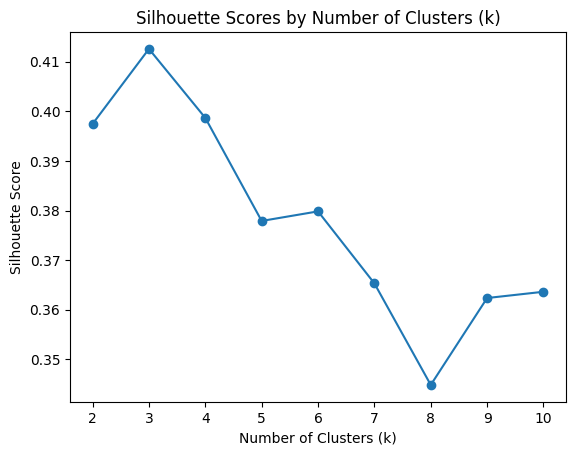

In [19]:
min_k = 2
max_k = 10

silhouette_scores = []
for k in tqdm(range(min_k, max_k+1)):
    kmeans = KMeans(n_clusters=k, n_init="auto", )
    kmeans.fit(dim_reduced_data)
    silhouette_scores.append(silhouette_score(dim_reduced_data, kmeans.labels_))

# Plot Silhouette Scores
plt.plot(range(min_k, max_k+1), silhouette_scores, marker='o')
plt.title('Silhouette Scores by Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

### Clustering & Visualization

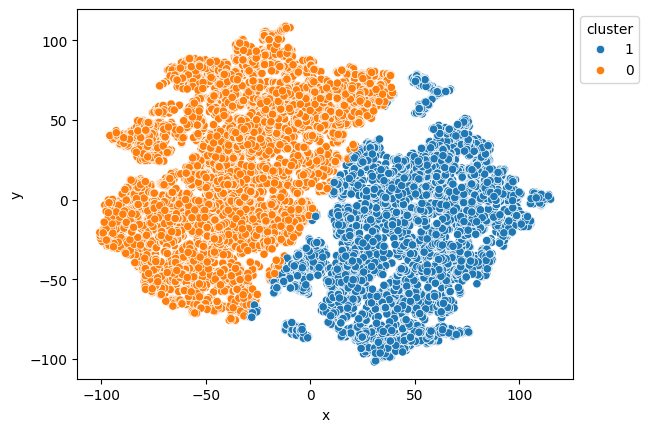

In [20]:
n_clusters = 2

df["cluster"] = KMeans(n_clusters=n_clusters, n_init="auto").fit_predict(dim_reduced_data)

# Interpret cluster IDs as string values for graph coloring
df['cluster'] = df['cluster'].astype(str)

df["x"] = dim_reduced_data[:, 0]
df["y"] = dim_reduced_data[:, 1]

tsne_plot = sns.scatterplot(
    x="x", y="y",
    hue="cluster",
    data=df,
    legend="full",
)
sns.move_legend(tsne_plot, "upper left", bbox_to_anchor=(1, 1))

### Cluster Properties

After clustering the data, we can examine the individual properties of data in each cluster to identify patterns.

In [21]:
features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude", "MEDV"]

df.groupby("cluster")[features].mean()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
cluster,,,,,,,,,
0,3.956271,28.451365,5.151907,1.060867,1555.417081,3.285668,33.886645,-117.999732,2.182073
1,3.763749,28.874469,5.775116,1.141403,1263.168138,2.802083,37.811813,-121.530758,1.926767


## 20 Newsgroups

Clustering on text data.

### Load the Dataset

In [22]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame({'text': newsgroups.data, 'newsgroup': newsgroups.target})

# Map target integers to newsgroup names
df['newsgroup'] = df['newsgroup'].map(lambda x: newsgroups.target_names[x])

df

,text,newsgroup
0,\n\nI am sure some bashers of Pens fans are pr...,rec.sport.hockey
1,My brother is in the market for a high-perform...,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,comp.sys.mac.hardware
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,sci.med
18842,\nNot in isolated ground recepticles (usually ...,sci.electronics
18843,I just installed a DX2-66 CPU in a clone mothe...,comp.sys.ibm.pc.hardware
18844,\nWouldn't this require a hyper-sphere. In 3-...,comp.graphics


### Vectorization Configuration

In [23]:
# Minimum number of documents that must contain a term
min_occurrences = 3

# Maximum percentage of all documents that can contain a term
max_df = 0.05

### Vectorize Documents

In [24]:
vectorizer = TfidfVectorizer(min_df=min_occurrences, max_df=max_df)
vectors = vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
vocabulary = list(vectorizer.get_feature_names_out())

print("{} terms occurred at least {} times and in at most {}% in the document collection".format(len(vocabulary), min_occurrences, max_df*100))

35761 terms occurred at least 3 times and in at most 5.0% in the document collection


### Dimensionality Reduction

Here we use **PCA** (principle components analysis) instead of T-SNE for performance reasons.

PCA is typically much faster than T-SNE, which is good for large datasets and a high number of features.

However, PCA is only able to capture linear patterns in the data, while T-SNE is able to capture non-linear patterns.

In [25]:
dim_reduced_data = PCA(n_components=2).fit_transform(tfidf_df)

### Evaluating Different Values of K

100%|██████████| 9/9 [00:29<00:00,  3.31s/it]


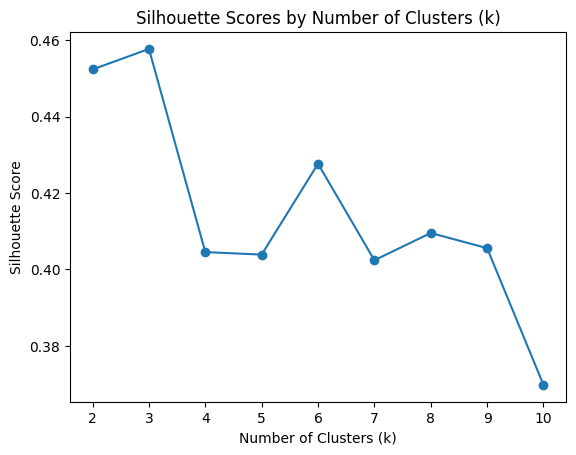

In [26]:
min_k = 2
max_k = 10

silhouette_scores = []
for k in tqdm(range(min_k, max_k+1)):
    kmeans = KMeans(n_clusters=k, n_init="auto", )
    kmeans.fit(dim_reduced_data)
    silhouette_scores.append(silhouette_score(dim_reduced_data, kmeans.labels_))

# Plot Silhouette Scores
plt.plot(range(min_k, max_k+1), silhouette_scores, marker='o')
plt.title('Silhouette Scores by Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

### Cluster Visualization

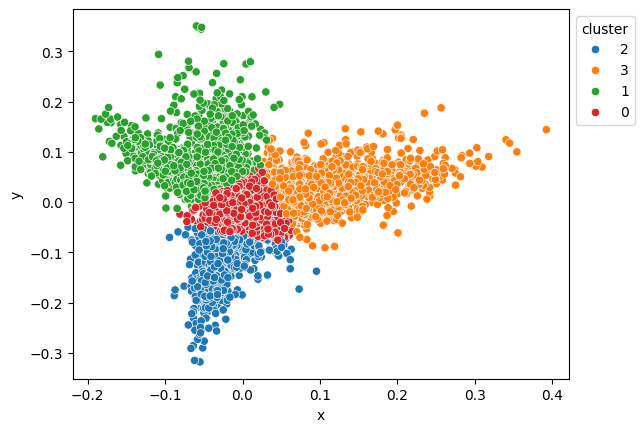

In [27]:
df["cluster"] = KMeans(n_clusters=4, n_init="auto").fit_predict(dim_reduced_data)

# Interpret cluster IDs as string values for graph coloring
df['cluster'] = df['cluster'].astype(str)

df["x"] = dim_reduced_data[:, 0]
df["y"] = dim_reduced_data[:, 1]

tsne_plot = sns.scatterplot(
    x="x", y="y",
    hue="cluster",
    data=df,
    legend="full",
)
sns.move_legend(tsne_plot, "upper left", bbox_to_anchor=(1, 1))

### Interpreting Text Clusters

Text clusters can be interpreted by computing the most important feature terms present in each cluster

In [28]:
def get_top_terms(text, vectorizer, n=15):
    vectorized = vectorizer.transform([text])

    vectorized_df = pd.DataFrame(vectorized.toarray(), columns=vectorizer.get_feature_names_out())

    non_zero_entries = []
    for column in vectorized_df.columns:
        if vectorized_df[[column]][column][0] > 0:
            non_zero_entries.append(column)

    return ", ".join(vectorized_df[non_zero_entries].transpose().sort_values(by=0, ascending=False).head(n).index)

In [29]:
top_terms = {}
for index, label in enumerate(df["cluster"].unique()):
    all_text = ' '.join(df[df["cluster"] == label]["text"])
    top_terms[index] = get_top_terms(all_text, vectorizer)
top_terms

{0: 'game, team, 00, games, hockey, season, play, players, 11, 20, win, 12, 15, league, period',
 1: 'file, dos, drive, image, software, jpeg, files, program, ftp, graphics, card, scsi, data, pc, version',
 2: 'government, jesus, she, law, her, armenian, key, president, armenians, mr, israel, children, jews, gun, life',
 3: 'ax, max, g9v, b8f, a86, pl, 1d9, 145, car, 34u, db, 1t, 0t, space, 75u'}